In [1]:
import numpy as np

In [2]:
import cv2 as cv

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import math

In [5]:
def showImage(imageForShowing):
    plt.figure(figsize = (10, 10))
    plt.imshow(imageForShowing, 'gray')

In [6]:
def showImages(image1, image2):
    f = plt.figure(figsize = (10, 10))
    f.add_subplot(1, 1, 1)
    plt.imshow(image1, 'gray')
    f.add_subplot(1, 1, 1)
    plt.imshow(image2, 'gray')
    plt.show(block=True)

In [7]:
img = cv.imread("1.jpg", 0)

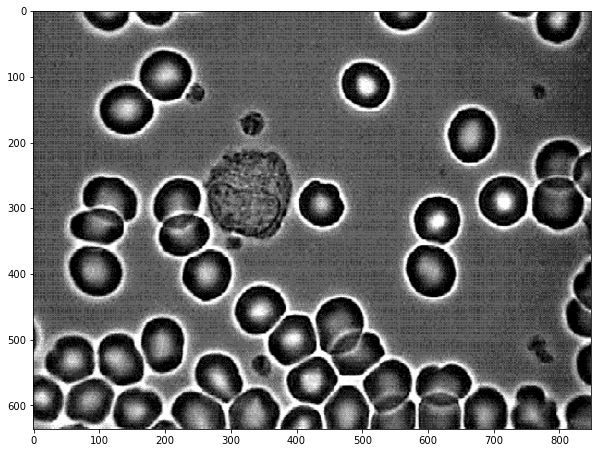

In [8]:
showImage(img)

In [9]:
imageShape = img.shape
print(imageShape)

(636, 849)


In [10]:
print(img)

[[ 44  43  13 ...   0   4   6]
 [ 43  44  12 ...   0   3   6]
 [ 72  94  94 ...  49  79  95]
 ...
 [123 100 143 ...  94  95  95]
 [123 100 142 ...  95  94  95]
 [124 101 142 ...  94  94  95]]


In [249]:
#Ядро сглаживающего фильтра 5 * 5
kernel = np.ones((3, 3),np.uint16) / 9
print(kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [250]:
#Сглаживание определенным выше ядром
dst = cv.filter2D(img, -1, kernel)

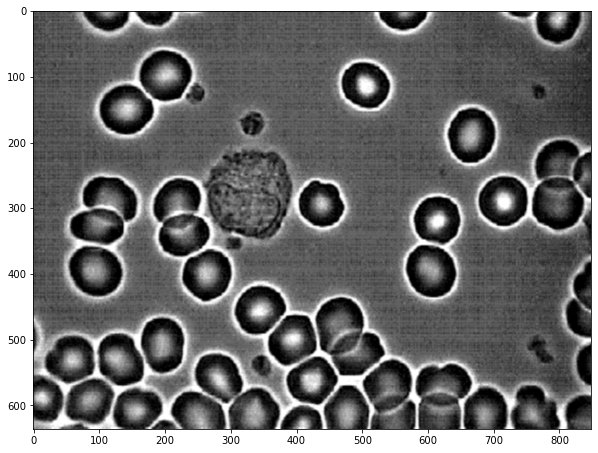

In [251]:
showImage(dst)

In [252]:
def MultiplyMinus1(imageForProcessing):
    result = np.zeros(imageShape)
    for x in range(imageShape[0]):
        for y in range(imageShape[1]):
            result[x, y] = imageForProcessing[x, y] * (-1)**(x + y) 
    return result

In [253]:
#Умножаем пиксели изображения на (-1)**(x + y)
shiftedImage = MultiplyMinus1(dst)

In [254]:
#Прямое преобразование Фурье
f = np.fft.fft2(shiftedImage)

In [255]:
magnitude_spectrum = np.log(np.abs(f))

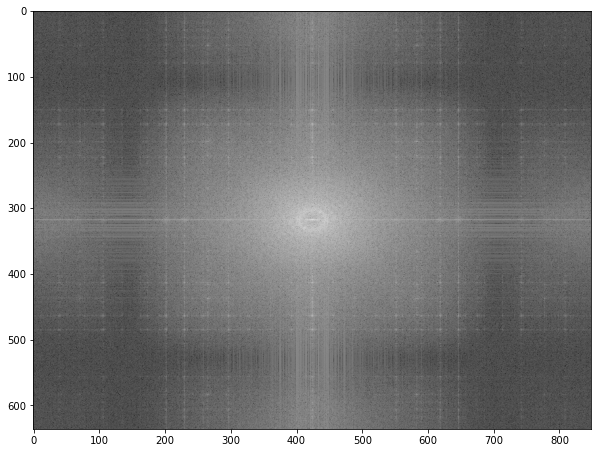

In [256]:
showImage(magnitude_spectrum)

In [295]:
D0 = 30
n = 2

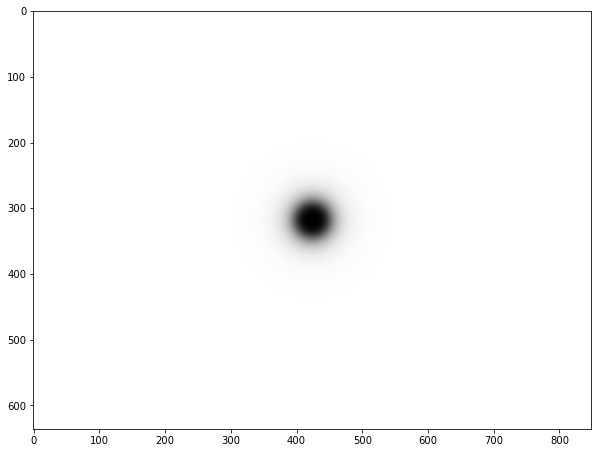

In [296]:
#Фильтр высоких частот Баттерворта
hhb = lambda df : 1 / (1 + (D0 /df ) ** (2 * n))
bfhf = np.zeros(imageShape)
for iu in range(imageShape[0]):
    for jv in range(imageShape[1]):
        bfhf[iu, jv] = hhb(d(iu, jv))
showImage(bfhf)

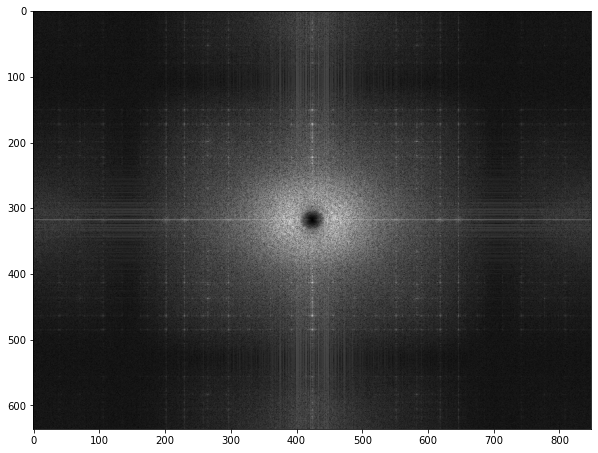

In [297]:
#Спектр после умножения на фильтр Баттерворта высоких частот
f_bfhf = f * bfhf
spectrum_bfhf = np.power(np.abs(f_bfhf), 0.3)
showImage(spectrum_bfhf)

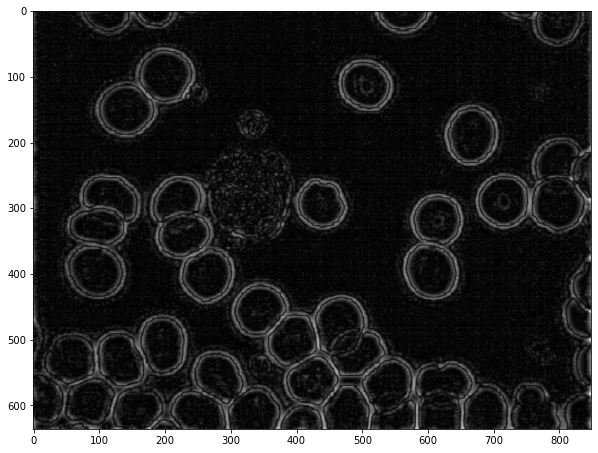

In [298]:
#Обратное преобразование Фурье после применения высокочастотного фильтра Батерворта
image_bfhf = np.abs(np.fft.ifft2(f_bfhf))
showImage(image_bfhf)

In [299]:
def CreateHisto(image):
    r = 256
    histogramData = np.zeros(r, np.uint16)
    for i in range(imageShape[0]):
        for j in range(imageShape[1]):
            index = int(image[i, j])
            histogramData[index] = histogramData[index] + 1
    return histogramData / (imageShape[0] * imageShape[1])

In [300]:
def CheckLimits(image):
    for i in range(imageShape[0]):
        for j in range(imageShape[1]):            
            if image[i, j] > 255:
                image[i,j] = 255
            if image[i, j] < 0:
                image[i, j] = 0
    return image

<BarContainer object of 256 artists>

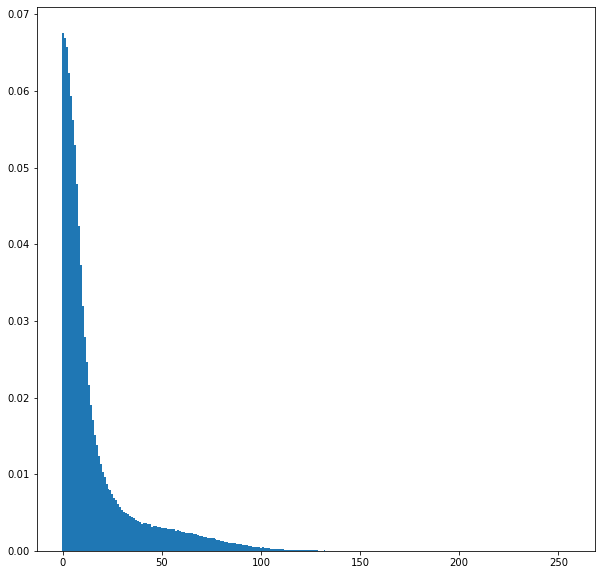

In [301]:
checkedImage = CheckLimits(image_bfhf)
histo = CreateHisto(checkedImage)
plt.figure(figsize = (10, 10))
plt.bar(range(256), histo, 1)

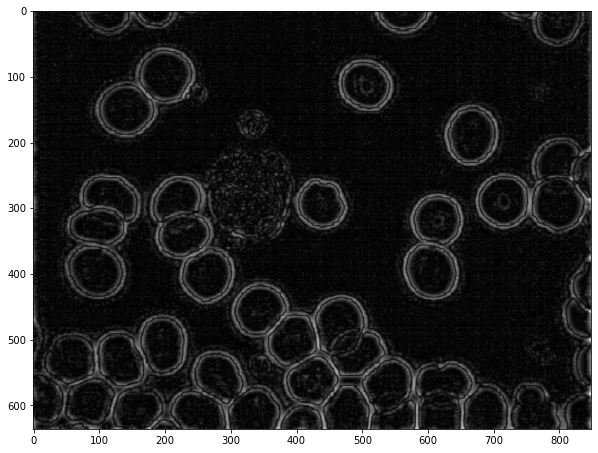

In [302]:
showImage(checkedImage)

float64


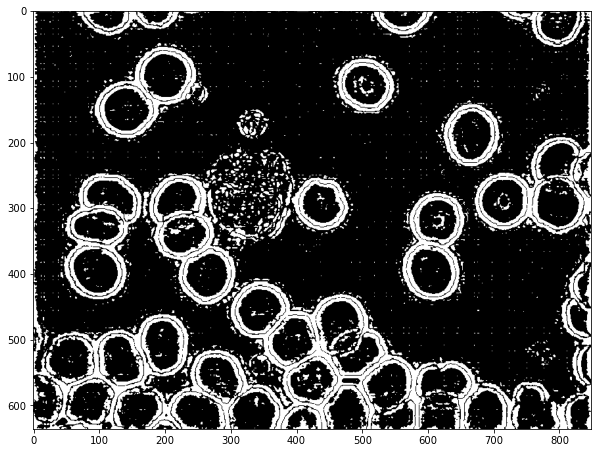

In [334]:
border = 25
r, thresholdedImage = cv.threshold(checkedImage, border, 1, cv.THRESH_BINARY)
print(thresholdedImage.dtype)
showImage(thresholdedImage)

In [326]:
def Open(image):
    kernel = np.ones((3,3),np.uint8)
    return cv.morphologyEx(image, cv.MORPH_OPEN, kernel)

In [327]:
def Close(image):
    kernel = np.ones((3,3),np.uint8)
    return cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)

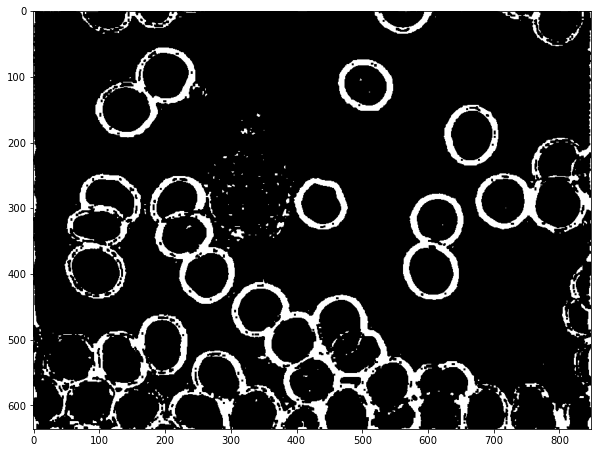

In [328]:
imgC1 = Close(thresholdedImage)
showImage(imgC1)

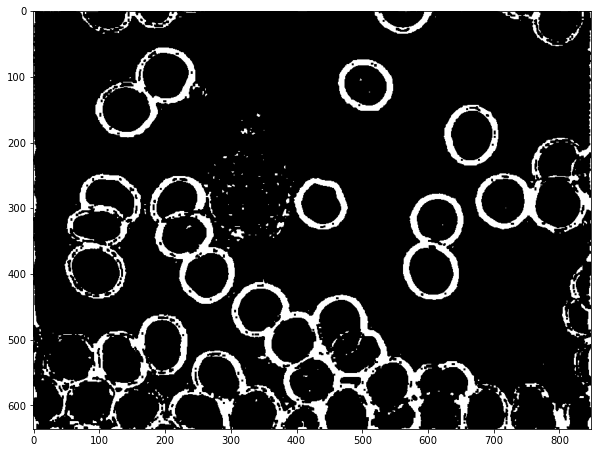

In [329]:
imgC2 = Close(imgC1)
showImage(imgC2)

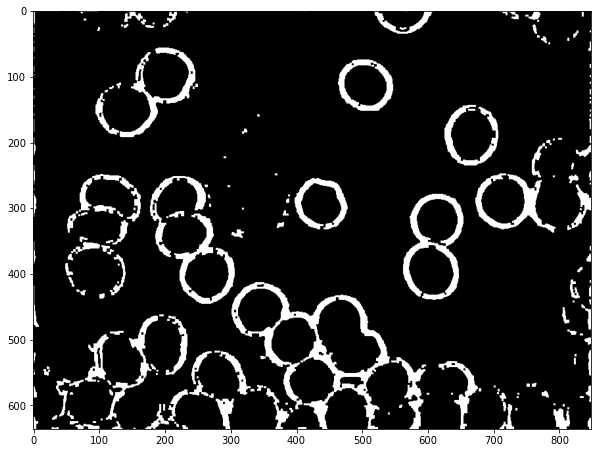

In [330]:
imgO1 = Open(imgC2)
showImage(imgO1)

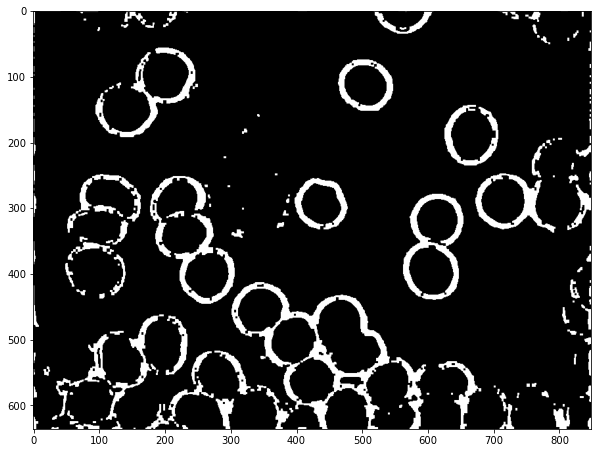

In [331]:
imgC3 = Close(imgO1)
showImage(imgC3)

In [332]:
#Маркируем известные области
imageForMarkering = cv.cvtColor(imgC3, cv.COLOR_HSV2BGR)
ret, markers = cv.connectedComponents(imageForMarkering)

error: OpenCV(4.2.0) d:\bld\libopencv_1579753504416\work\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,-1,-1>,struct cv::impl::A0x5a830bcc::Set<3,4,-1>,struct cv::impl::A0x5a830bcc::Set<0,5,-1>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
